# Classification - Is the flight delayed or not ?

In [ ]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Imbalanced dataset helpers
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to your file within Google Drive
file_path = '/content/drive/MyDrive/PFE/flights.csv'

# Read the file using pandas
df = pd.read_csv(file_path)

Axes(0.125,0.11;0.698618x0.77)


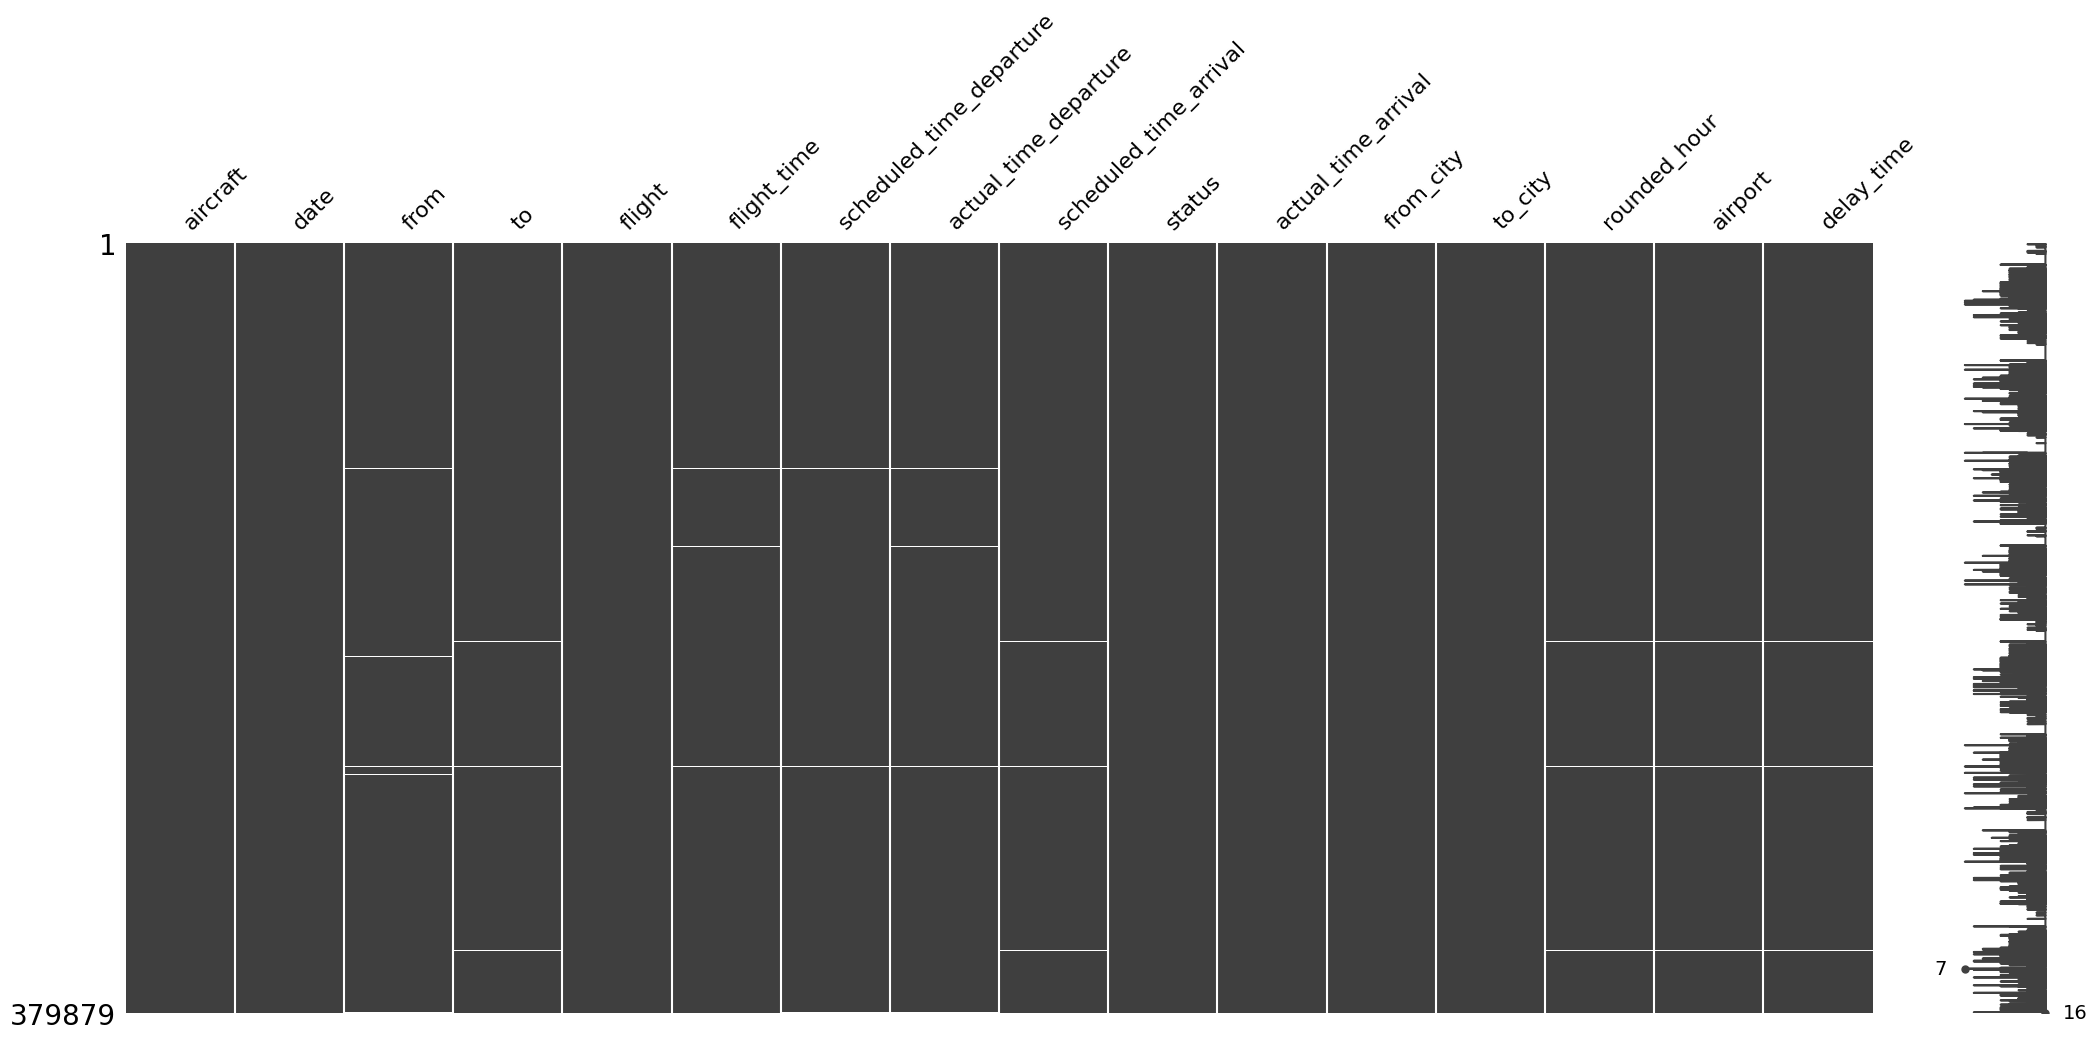

In [ ]:
print(msno.matrix(df))

In [ ]:
df.dropna(inplace=True)

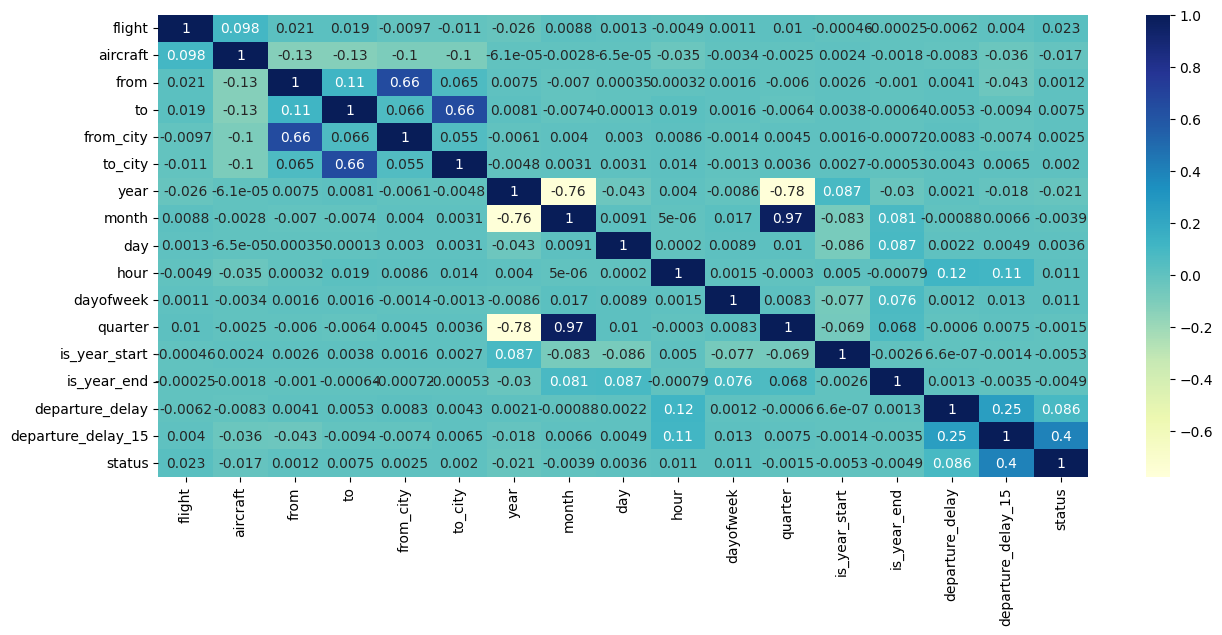

In [ ]:
plt.figure(figsize=(15,6))

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
df['status'] = df['status'].map({"On Time": 0, "Delayed": 1})

# Convert datetime string column to datetime type
df['flight_time'] = pd.to_datetime(df['flight_time']).dt.tz_localize(None)
df['scheduled_time_departure'] = pd.to_datetime(df['scheduled_time_departure']).dt.tz_localize(None)
df['actual_time_departure'] = pd.to_datetime(df['actual_time_departure']).dt.tz_localize(None)
df['scheduled_time_arrival'] = pd.to_datetime(df['scheduled_time_arrival']).dt.tz_localize(None)
df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
df["status"] = df["status"].astype('int')

df["departure_delay"] = df["actual_time_departure"] - df["scheduled_time_departure"]

# Convert the departure delay to minutes
df['departure_delay'] = df['departure_delay'].dt.total_seconds() / 60

df["departure_delay_15"] = df["departure_delay"] > 15
df["departure_delay_15"] = df["departure_delay_15"].astype('int')

df['year'] = df['scheduled_time_arrival'].dt.year
df['month'] = df['scheduled_time_arrival'].dt.month
df['day'] = df['scheduled_time_arrival'].dt.day
df['hour'] = df['scheduled_time_arrival'].dt.hour
df['dayofweek'] = df['scheduled_time_arrival'].dt.dayofweek
df['quarter'] = df['scheduled_time_arrival'].dt.quarter
df['is_year_start'] = df['scheduled_time_arrival'].dt.is_year_start
df['is_year_end'] = df['scheduled_time_arrival'].dt.is_year_end

df["is_year_start"] = df["is_year_start"].astype('int')
df["is_year_end"] = df["is_year_end"].astype('int')

cols = ['flight', 'aircraft', 'from', 'to', 'from_city',
       'to_city', 'year', 'month', 'day', 'hour', 'dayofweek', 'quarter', 'is_year_start', 'is_year_end', 'departure_delay', 'departure_delay_15', 'status']

df = df[cols]

In [ ]:
print(len(df))

376243


In [ ]:
df.isna().sum()

flight                0
aircraft              0
from                  0
to                    0
from_city             0
to_city               0
year                  0
month                 0
day                   0
hour                  0
dayofweek             0
quarter               0
is_year_start         0
is_year_end           0
departure_delay       0
departure_delay_15    0
status                0
dtype: int64

In [ ]:
df.status.value_counts()

status
0    305273
1     70970
Name: count, dtype: int64

In [ ]:
# encode categorical data into numeric values
labelEncoder = LabelEncoder()
df["flight"] = labelEncoder.fit_transform(df["flight"])
df["aircraft"] = labelEncoder.fit_transform(df["aircraft"])
df["from"] = labelEncoder.fit_transform(df["from"])
df["to"] = labelEncoder.fit_transform(df["to"])
df["from_city"] = labelEncoder.fit_transform(df["from_city"])
df["to_city"] = labelEncoder.fit_transform(df["to_city"])

In [ ]:
# Show the first few rows of the DataFrame
pd.set_option('display.max_columns', None)
df.head()

,flight,aircraft,from,to,from_city,to_city,year,month,day,hour,dayofweek,quarter,is_year_start,is_year_end,departure_delay,departure_delay_15,status
0,19441,280,92,1633,1554,1426,2024,3,20,12,2,1,0,0,13.0,0,0
1,19319,280,1770,90,1701,1554,2024,3,3,18,6,1,0,0,9.0,0,0
2,19331,280,92,1011,1554,953,2023,12,3,14,6,4,0,0,13.0,0,0
3,19329,280,1010,90,956,1554,2023,12,3,11,6,4,0,0,16.0,1,0
4,19372,280,1358,90,1229,1554,2023,8,11,23,4,3,0,0,0.0,0,0


In [ ]:
df.dtypes

flight                  int64
aircraft                int64
from                    int64
to                      int64
from_city               int64
to_city                 int64
year                    int32
month                   int32
day                     int32
hour                    int32
dayofweek               int32
quarter                 int32
is_year_start           int64
is_year_end             int64
departure_delay       float64
departure_delay_15      int64
status                  int64
dtype: object

In [ ]:
X = df.loc[:, df.columns != "status"]
y = np.array(df.loc[:, df.columns == "status"]["status"])

In [ ]:
X.head()

,flight,aircraft,from,to,from_city,to_city,year,month,day,hour,dayofweek,quarter,is_year_start,is_year_end,departure_delay,departure_delay_15
0,19441,280,92,1633,1554,1426,2024,3,20,12,2,1,0,0,13.0,0
1,19319,280,1770,90,1701,1554,2024,3,3,18,6,1,0,0,9.0,0
2,19331,280,92,1011,1554,953,2023,12,3,14,6,4,0,0,13.0,0
3,19329,280,1010,90,956,1554,2023,12,3,11,6,4,0,0,16.0,1
4,19372,280,1358,90,1229,1554,2023,8,11,23,4,3,0,0,0.0,0


In [ ]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
print(f"\nDataset shape: {df.shape}")
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")


Dataset shape: (376243, 17)
X_train shape: (300994, 16) | X_test shape: (75249, 16)
y_train shape: (300994,) | y_test shape: (75249,)


## Logistic regression

In [ ]:
model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     61055
           1       0.31      0.00      0.01     14194

    accuracy                           0.81     75249
   macro avg       0.56      0.50      0.45     75249
weighted avg       0.72      0.81      0.73     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([75101,   148]))

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     61055
           1       0.76      0.77      0.76     14194

    accuracy                           0.91     75249
   macro avg       0.85      0.85      0.85     75249
weighted avg       0.91      0.91      0.91     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([60896, 14353]))

## XGBoost

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     61055
           1       0.86      0.76      0.81     14194

    accuracy                           0.93     75249
   macro avg       0.90      0.87      0.88     75249
weighted avg       0.93      0.93      0.93     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([62751, 12498]))

## Random Forest

In [ ]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     61055
           1       0.88      0.79      0.83     14194

    accuracy                           0.94     75249
   macro avg       0.92      0.88      0.90     75249
weighted avg       0.94      0.94      0.94     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([62539, 12710]))

## Extra Trees Classifier

In [ ]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     61055
           1       0.90      0.75      0.81     14194

    accuracy                           0.94     75249
   macro avg       0.92      0.86      0.89     75249
weighted avg       0.93      0.94      0.93     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([63429, 11820]))

## Dataset Without Handling Imbalance

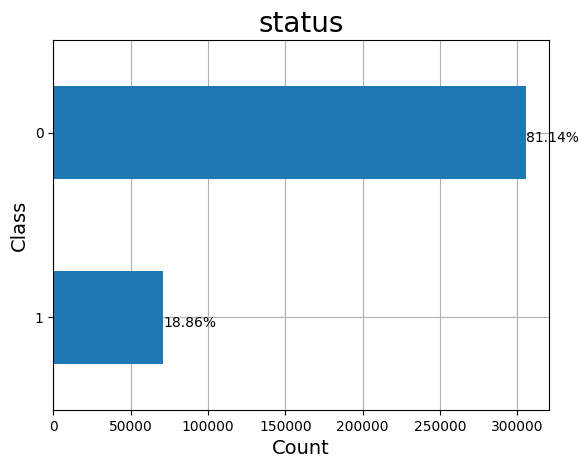

status
0    305273
1     70970
Name: count, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = df["status"].value_counts().sort_values().plot(kind="barh")
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("status", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["status"].value_counts())
fig = ax.get_figure()

## Random Oversampling

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

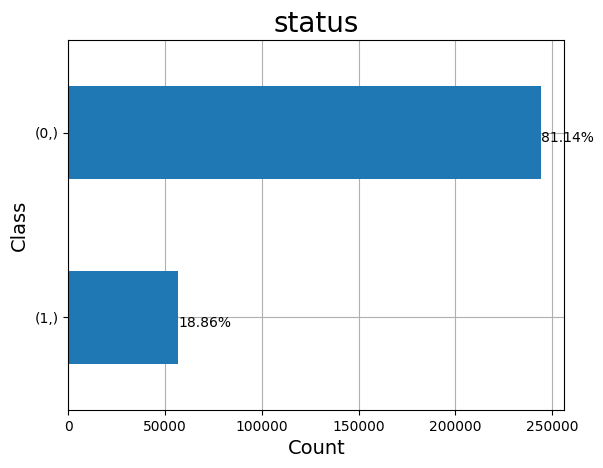

0    244218
1     56776
Name: count, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(y_train).value_counts().sort_values().plot(kind="barh")
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("status", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(y_train).value_counts())
fig = ax.get_figure()

## Model after over sampling

In [ ]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     61055
           1       0.85      0.83      0.84     14194

    accuracy                           0.94     75249
   macro avg       0.90      0.90      0.90     75249
weighted avg       0.94      0.94      0.94     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([61457, 13792]))

## Random Oversampling

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

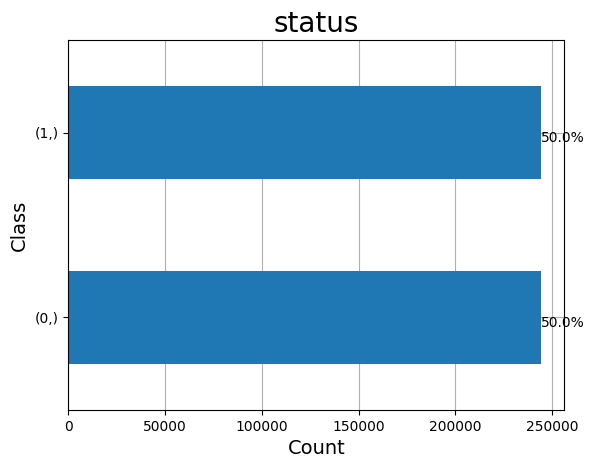

0    244218
1    244218
Name: count, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(y_train).value_counts().sort_values().plot(kind="barh")
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
plt.title("status", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(y_train).value_counts())
fig = ax.get_figure()

## Model after SMOTE

In [ ]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
model_pred = model.predict(X_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     61055
           1       0.82      0.84      0.83     14194

    accuracy                           0.94     75249
   macro avg       0.89      0.90      0.89     75249
weighted avg       0.94      0.94      0.94     75249



In [ ]:
np.unique(model_pred, return_counts=True)

(array([0, 1]), array([60819, 14430]))

# => Over sampling performed better

Text(0, 0.5, 'Features')

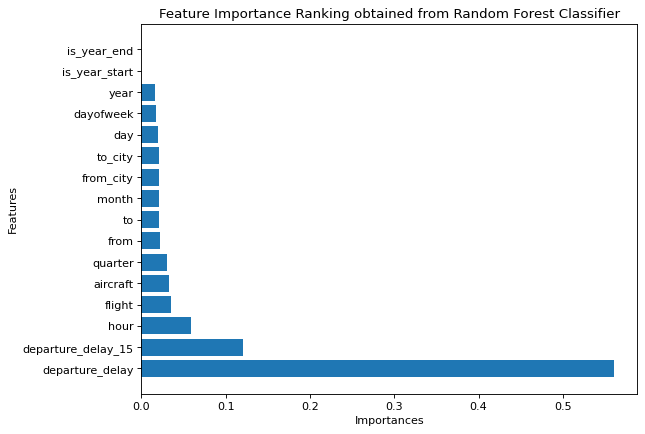

In [ ]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")